In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
global_temp = pd.read_csv("/content/GlobalTemperatures.csv")

In [3]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp['dt'][0].split('-')[0]

'1750'

In [5]:
def fetch_year(date):
  return date.split('-')[0]

In [6]:
global_temp['years'] = global_temp['dt'].apply(fetch_year)

In [7]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [8]:
data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [9]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [10]:
data['Uncertainity_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [11]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [12]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

Another is way is using Plotly if you are looking for a Responsive Chart.

Plotly Method:

In [13]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['Uncertainity_top','LandAverageTemperature','Uncertainity_bottom']:
    fig.add_trace(go.Line(x=data.years, y=data[col],name=col))
fig.show()

Explore Average Temperature of Each Season

In [14]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [15]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [16]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

Fetching Month

In [17]:
global_temp['month']=global_temp['dt'].dt.month

In [18]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [19]:
def get_season(month):
  if month>=3 and month<=5:
    return 'spring'
  elif month>=6 and month<=8:
    return 'summer'
  elif month>=9 and month<=11:
    return 'autumn'
  else:
    return'winter'

In [20]:
global_temp['season']=global_temp['month'].apply(get_season)

In [21]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [22]:
years=global_temp['years'].unique()

In [23]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [24]:
for year in years:
  current_df=global_temp[global_temp['years']==year]
  spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
  summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
  autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
  winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())


In [25]:
season=pd.DataFrame()

In [26]:
season['year']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps


In [27]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [28]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'], dtype='object')

In [29]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['spring_temps','summer_temps', 'autumn_temps', 'winter_temps']:
    fig.add_trace(go.Line(x=season.year, y=season[col],name=col))
fig.show()

Perform Data Pre-Processing on your data



In [30]:
cities=pd.read_csv("/content/GlobalLandTemperaturesByCity.csv")

In [31]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [32]:
cities.shape

(292344, 7)

In [33]:
usa=cities[cities['Country']=='United States']

In [34]:
usa.shape

(20898, 7)

In [35]:
data=['New York','Los Angeles','San Francisco']

In [36]:
data2=usa[usa['City'].isin(data)]

In [37]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [38]:
data2=data2[['dt','AverageTemperature']]

In [39]:
data2.head()

,dt,AverageTemperature


In [40]:
data2.columns=['Date','Temp']

In [41]:
data2.head()

,Date,Temp


In [42]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [43]:
data2['Date']=pd.to_datetime(data2['Date'])

In [44]:
data2.isna().sum()

Date    0
Temp    0
dtype: int64

In [45]:
data2.dropna(inplace=True)

In [46]:
data2.shape

(0, 2)

In [47]:
data2.set_index('Date',inplace=True)

In [48]:
data2.head()

,Temp
Date,


How to check Whether Data is Stationery or not


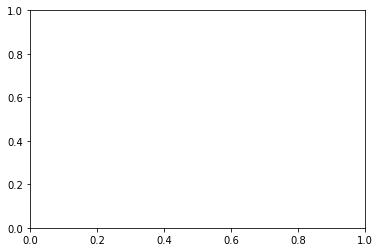

In [49]:
sns.lineplot(x=data2.index,y=data2['Temp'])

In [53]:
from statsmodels.tsa.stattools import adfuller

In [52]:
  test_result=adfuller(data2['Temp'])

ValueError: ignored

In [ ]:
def adfuller_test(Temp):
  result=adfuller(data2['Temp'])
  labels=['ADF Test Statistics','p-valve','#lags used','Number of observations used']

  for value,label in zip(result,labels):
    print(label+':'+str(value))
  if result[1]<0.05:
    print('Strong evidence against the null hypo, reject the null hypo,data has no unit root and is stationery')
  else:
    print('Weak evidence against the null hypo, accept the null hypo,data has no unit root and is stationery')

In [ ]:
adfuller_test(data2['Temp'])

In [ ]:
df=data2.copy()

In [ ]:
df.head()

In [ ]:
df['first_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [ ]:
df.head(20)

In [ ]:
adfuller_test(df['first_temp_diff'].dropna())

In [ ]:
df[['first_temp_diff']].plot(figsize=(30,15))

 Examine seasonality in a data


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
data2.head()

In [ ]:
data2['month']=data2.index.month

In [ ]:
data2['year']=data2.index.year

In [ ]:
data2.head()

In [ ]:
pivot=data2.pivot_table(values="Temp",index='month',columns='year')

In [ ]:
pivot

In [ ]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')

In [ ]:
monthly_seasonality=pivot.mean(axis=1)

In [ ]:
monthly_seasonality.plot(figsize=(20,6))

Build Time Series Model using Moving Average


In [ ]:
df.head()

In [ ]:
df=df[['first_temp_diff']]

In [ ]:
df.head()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

In [ ]:
df['first_temp_diff'].rolling(window=5).mean()

In [ ]:
value=pd.DataFrame(df['first_temp_diff'])

In [ ]:
temp_df=pd.concat([value,df['first_temp_diff'].rolling(window=5).mean()],axis=1)

In [ ]:
temp_df.columns=['actual_temp','forecast_temp']

In [ ]:
temp_df.head(20)

Evaluate moving Average model

In [ ]:
from sklearn.metrics import mean_squared_error

In [54]:
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

NameError: ignored

Applying ARIMA algorithm on your data


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.head()

In [ ]:
plot_acf(df['first_temp_diff'].dropna())

In [ ]:
plot_pacf(df['first_temp_diff'].dropna())

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
training_data=df[0:6000]
test_data=df[6000:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima=ARIMA(training_data,order=(2,1,3))

In [ ]:
model=arima.fit()

In [ ]:
predictions=model.forecast(steps=len(test_data))[0]

In [ ]:
np.sqrt(mean_squared_error(test_data,predictions))

To Cross Validate your Time Series Model


In [ ]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [ ]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order=(p,d,q)
      train=[0:6000]
      test=[6000:]
      predictions=[]
      for i in range(len(test)):
        try:
          arima=ARIMA(train,order)
          model=arima.fir(disp=0)
          pred=model.forcast.append(pred)
          error=mean_squared_error(test,predictions)
          print('MSE is{} with order {}.'format(error,order))
        except:
          continue

